---
title: "The Bit Bridge: Why Modern AI Still Speaks in 1970s \"ASCII Armor\""
author: "Josh Pearlson"
date: "2025-12-19"
categories: [LLM]
---

A journey from the 7-bit limitations of early dial-up to the multimodal prompts of today, exploring why 'ASCII Armor' remains the essential glue for modern AI.

---

![The Bit Bridge](../../../media/ascii_armor.png)

## The Bit Bridge: Why Modern AI Still Speaks in 1970s "ASCII Armor"

In the world of Generative AI, we often focus on the new developments: neural networks, transformer architectures, and trillion-parameter models. But if you peek under the hood of a request sent to GPT-5 or Gemini 3, you’ll find a relic from ages ago.

It looks like a wall of digital noise:

`data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...`

To the uninitiated, this is gibberish. To a developer, it’s **Base64**. But to a computer historian, it goes by a more popular name: **"ASCII Armor."**


## The Missing Eighth Bit

In the 1970s, the internet was a "fragile" place. Early networks were designed for 7-bit ASCII, perfect for English text, but catastrophic for 8-bit binary files.

Data transmission historically was expensive and slow. To save space, engineers used 7-bit ASCII for text representation. 7 bits can represent $2^7$, or 128 different values (0 to 127). This was enough to represent the full english alphabet (A-Z, a-z), numbers (0-9), basic punctuation, and 'control characters' like Enter or Tab. 

However, most computers at the time typically used 8-bit (1 byte) systems. If you tried to send a raw image, the network would often "strip" the eighth bit of every byte to save space. It was like removing every third letter from a sentence; the data arrived shredded. Worse, binary sequences could accidentally trigger "control codes", which were bits of data that told a printer to stop or a modem to hang up.

As a solution, developers began "armoring" their data. By disguising binary files as a safe string of alphanumeric text, they ensured the data could survive the journey across imperfect networks. And thus, Base64 was created.

## What is Base64?

To solve the problem of sending raw data across the internet via traditional methods Base64 creates a mapping between the world of bits and bytes and the world of text and symbols. 

Here is how it works. Lets first take 3 bytes of information, containing 24 individual bits. With these 24 bits we will then split them into 4 groups of 6 bits. For each of the 6-bit groups we will map them to one real char (shown below in the table).

| Value Range | Binary Range | Characters |
|------------|-------------|------------|
| 0–25  | 000000–011001 | A–Z |
| 26–51 | 011010–110011 | a–z |
| 52–61 | 110100–111101 | 0–9 |
| 62    | 111110        | + |
| 63    | 111111        | / |

This does come at a cost however. For each 3 bytes of information, you will notice that this process created 4 characters. You may ask, well why don't we just use more characters to the point where we can represent each byte with a single character.

This is a great question, the key problem is that representing each number in a fully byte requires $2^8$ or 256 different values. We do not have that many 'clean' char values that are supported over standard text mechanisms.




## What does Base64 have to do with LLMs and modern AI? 

Well, these days we sure do love API's. For the uninitiated, API stands for application program interface. With API's we can abstractly send a request to a server and receive a desired response. Modern API developers love a format called JSON. This format is very similar (often times interchangeable) with a generic nested form of Python dictionaries and lists.

```python

json_obj = {
  "key1": "value1",
  "key2": 123,
  "key3": true,
  "key4": [
    "item1",
    "item2"
  ],
  "key5": {
    "nestedKey": "nestedValue"
  }
}
```

However when sending JSON requests, it becomes very hard to include raw data in the form of a file. And even if you could just include raw bytes, this represents a serious security issue. This would be allowing a random API user to execute arbitrary bytes of data on your computer or server. Very bad stuff. However thankfully instead we can turn to Base64 and old fashioned ASCII Armor to fix this problem. 

---
# Base64 Demo

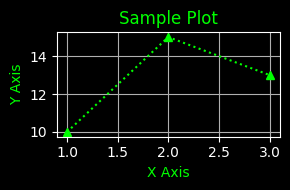

In [88]:
import matplotlib.pyplot as plt

x_axis = [1, 2, 3]
y_axis = [10, 15, 13]

fig = plt.figure(figsize=(3,2), facecolor='black')
ax = fig.add_subplot(111, facecolor='black')
ax.plot(x_axis, y_axis, marker='^', ls=':', color='lime')
ax.set_title("Sample Plot", color='lime')
ax.set_xlabel("X Axis", color='lime')
ax.set_ylabel("Y Axis", color='lime')
ax.grid(True)
for spine in ax.spines.values():
    spine.set_edgecolor('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.tight_layout()
plt.savefig('your_image.png')
plt.show()

Now let's convert this image into bytes, Armor it with Base64, then convert it back to bytes and view the image!

In [89]:
from IPython.display import Image, display

# Load the file as binary ('rb' mode)
file_path = 'your_image.png' 
with open(file_path, "rb") as image_file:
    raw_bytes = image_file.read()

print(f"Total Bytes: {len(raw_bytes)}")
binary_preview = ' '.join(f'{byte:08b}' for byte in raw_bytes[:4])
hex_preview = ' '.join(f'{byte:02x}' for byte in raw_bytes[:4])
print(f"First 4 Bytes (binary): {binary_preview}")
print(f"First 4 Bytes (hex): {hex_preview}")


Total Bytes: 7940
First 4 Bytes (binary): 10001001 01010000 01001110 01000111
First 4 Bytes (hex): 89 50 4e 47


Encoding data to Base64: 

Base64 Data should be ~33% larger than original data.
Base64 Encoded Length: 10588, 33.35% greater than original.
Base64 Encoded Preview: iVBORw0KGgoAAAANSUhE...

Sending Base64 encoded data to API...
Receiving Base64 encoded data from API...

Decoded Bytes Length: 7940
Displaying Decoded Image:


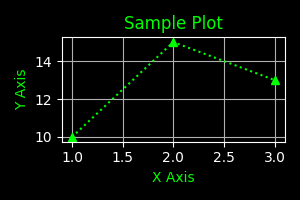

In [90]:
import base64

print("Encoding data to Base64: \n")
encoded_bytes = base64.b64encode(raw_bytes).decode('utf-8')
print(f"Base64 Data should be ~33% larger than original data.")
pct_diff = (len(encoded_bytes) - len(raw_bytes)) / len(raw_bytes) * 100
print(f"Base64 Encoded Length: {len(encoded_bytes)}, {pct_diff:.2f}% greater than original.")
print(f"Base64 Encoded Preview: {encoded_bytes[:20]}...\n")

print("Sending Base64 encoded data to API...")
print("Receiving Base64 encoded data from API...\n")
decoded_bytes = base64.b64decode(encoded_bytes)
print(f"Decoded Bytes Length: {len(decoded_bytes)}")
print("Displaying Decoded Image:")
display(Image(data=decoded_bytes))



It is always fascinating to see how circular technology is. We often revert to the most simple fixes as they end up being the most elegant to use. Personally I love remembering that whenever I am using a LLM with multi-modal and tool use capabilities, under the hood 70's computer science is peering through. 

As always, till next time. 

JCP